In [ ]:
Box Plots
Objectives:

Visualize the distribution of data.

Visualize the relationship between two features.

Visualize data composition and comparisons using box plots.

In [1]:
!pip install pandas
!pip install matplotlib
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


In [7]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"
r = requests.get(url)

with open("survey-data.sqlite", "wb") as f:
    f.write(r.content)

print("Download complete.")


Download complete.


In [13]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Get the table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print table names
print("Available tables:")
for table in tables:
    print(table[0])




Available tables:
main


In [14]:
#Demo 1: Count the Number of Rows in the Table
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


In [15]:
# Demo 2: List All Tables
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


In [16]:
#Demo 3: Group Data by Age
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [ ]:
Task 1: Visualizing the Distribution of Data
1. Box Plot of CompTotal (Total Compensation)

Use a box plot to analyze the distribution and outliers in total compensation.

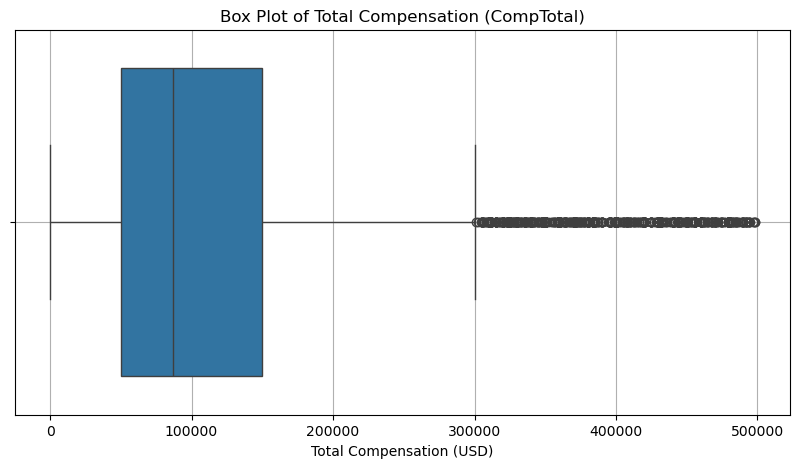

In [19]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load the 'CompTotal' column from the 'main' table
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Clean data
df = df.dropna(subset=["CompTotal"])            # Remove missing values
df = df[df["CompTotal"] > 0]                    # Remove non-positive compensation
df = df[df["CompTotal"] < 500000]               # Optional: remove extreme outliers

# Step 4: Create the box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["CompTotal"])
plt.title("Box Plot of Total Compensation (CompTotal)")
plt.xlabel("Total Compensation (USD)")
plt.grid(True)
plt.show()




In [ ]:
2. Box Plot of CompTotal for the Top 5 Countries:

Analyze compensation across respondents from the top 5 countries.


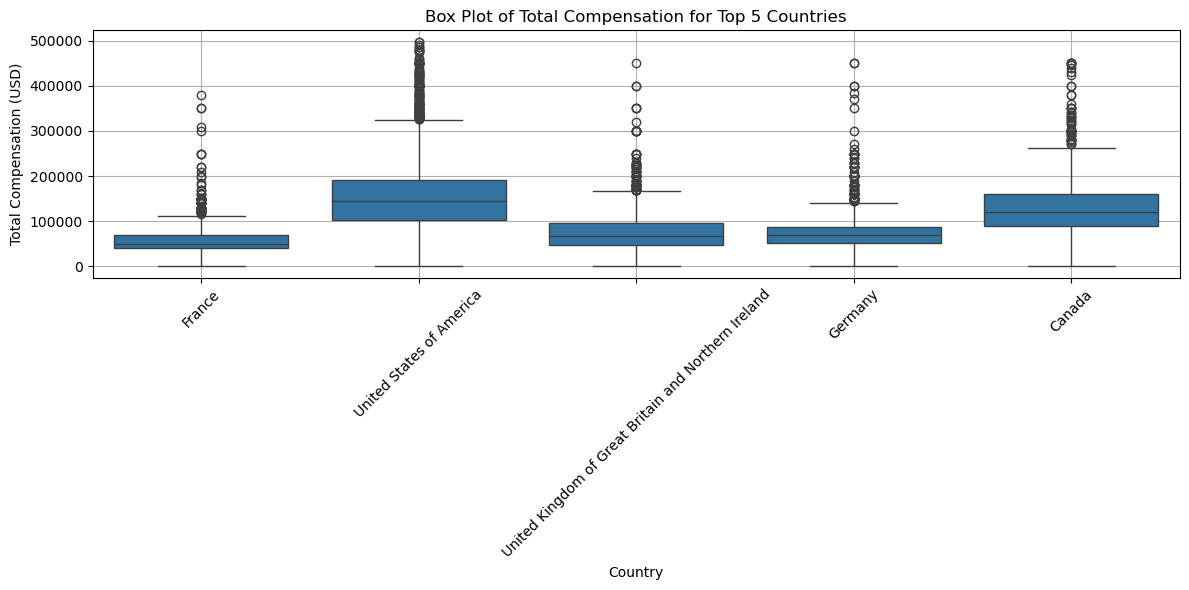

In [20]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Connect to database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query Country and CompTotal from the 'main' table
query = "SELECT Country, CompTotal FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Clean the data
df = df.dropna(subset=["Country", "CompTotal"])    # Drop missing values
df = df[df["CompTotal"] > 0]                       # Remove non-positive compensation
df = df[df["CompTotal"] < 500000]                  # Remove extreme outliers (optional)

# Step 4: Get top 5 countries by number of respondents
top_5_countries = df["Country"].value_counts().nlargest(5).index.tolist()
df_top5 = df[df["Country"].isin(top_5_countries)]

# Step 5: Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x="Country", y="CompTotal")
plt.title("Box Plot of Total Compensation for Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Box Plot of CompTotal Across Employment Types:

Analyze compensation for different employment types.

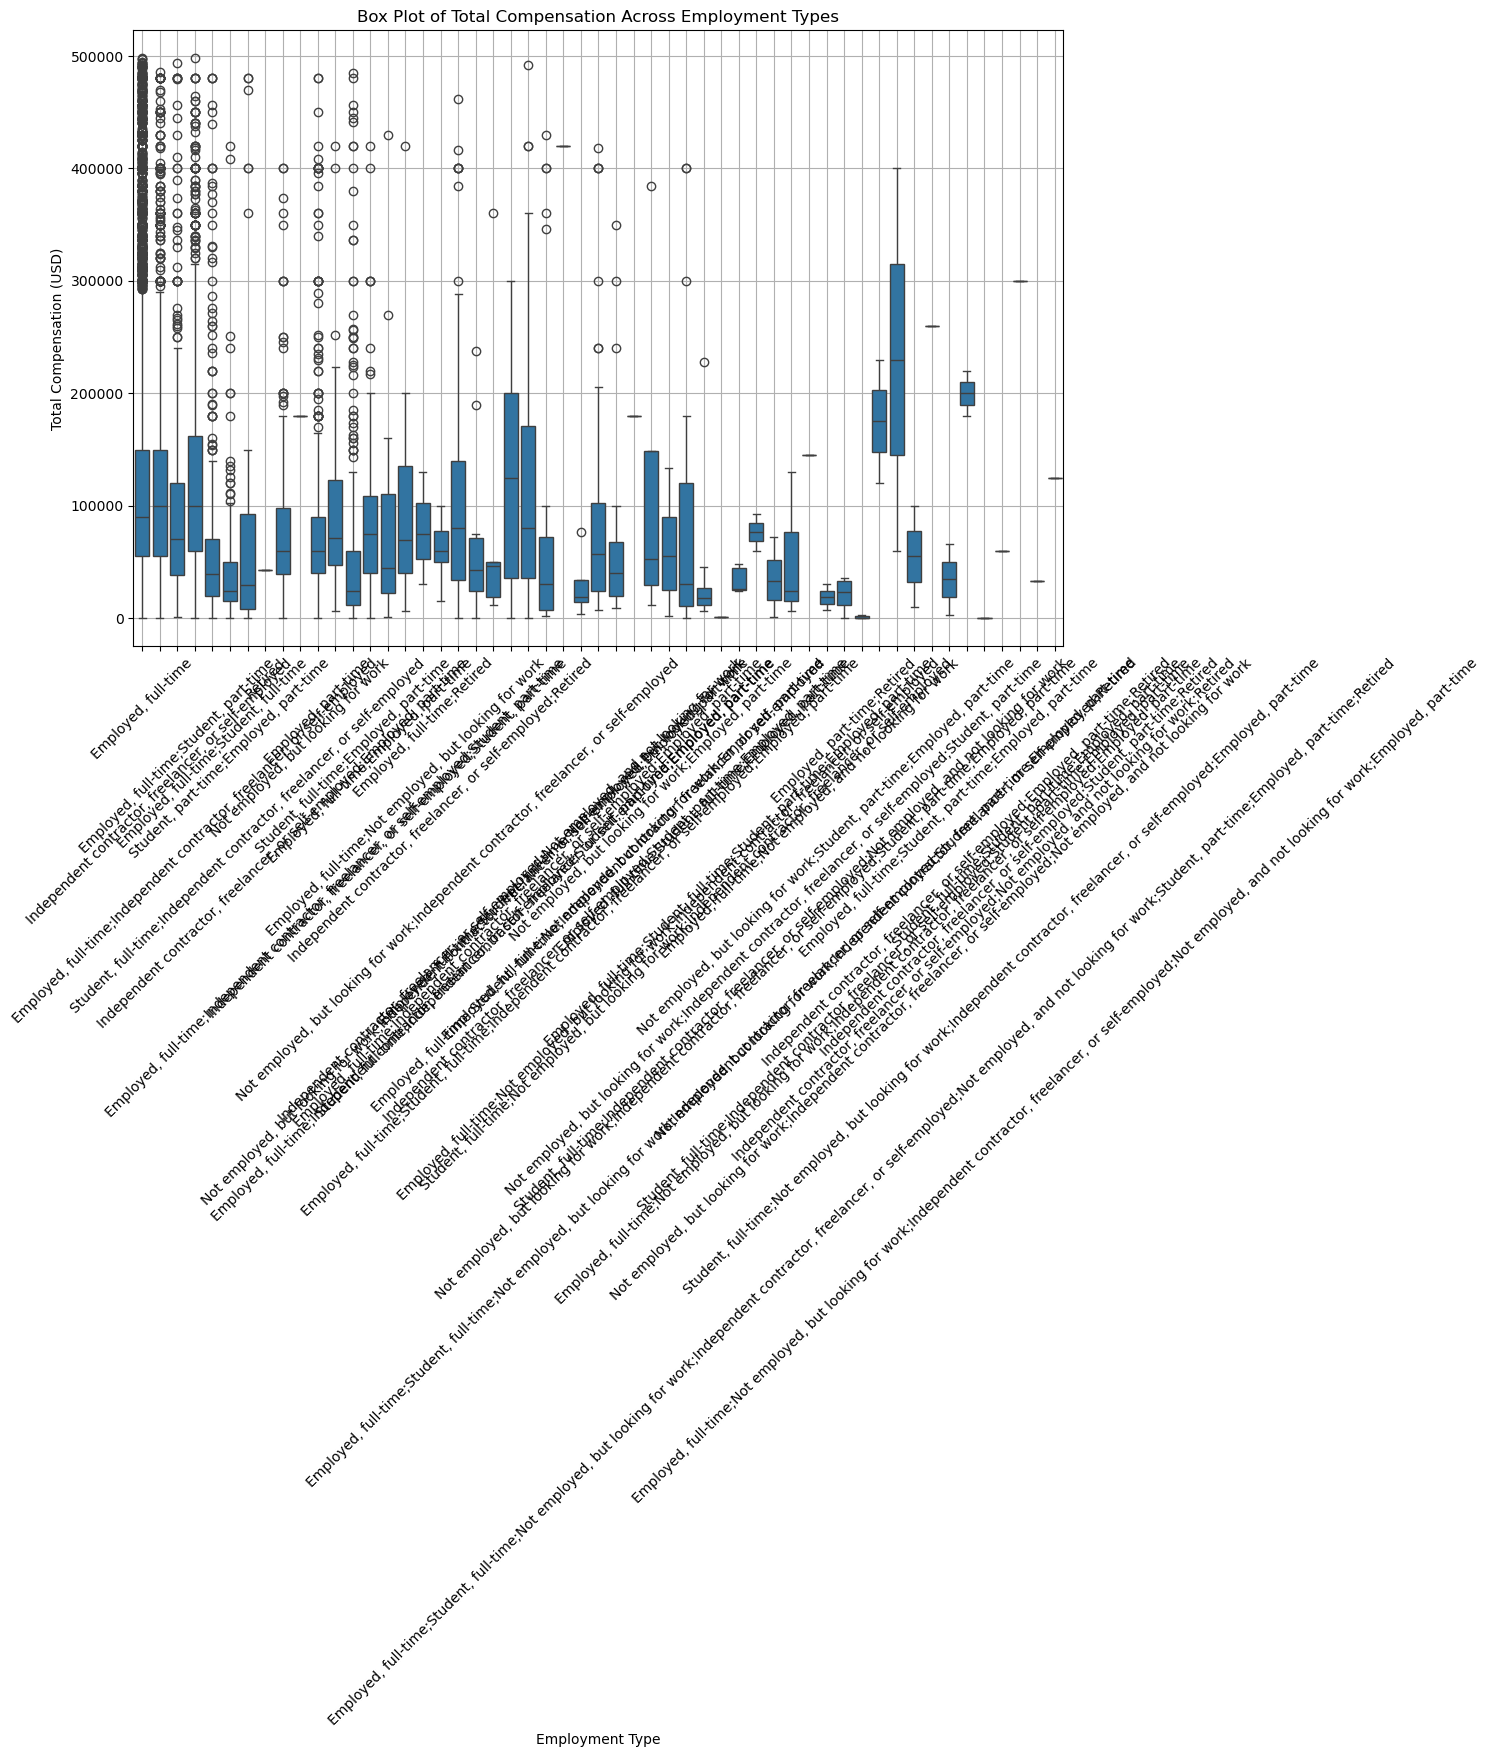

In [24]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load Employment and CompTotal columns
query = "SELECT Employment, CompTotal FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Clean the data
df = df.dropna(subset=["Employment", "CompTotal"])   # Remove missing values
df = df[df["CompTotal"] > 0]                         # Remove non-positive compensation
df = df[df["CompTotal"] < 500000]                    # Optional: remove extreme outliers

# Step 4: Plot the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Employment", y="CompTotal")
plt.title("Box Plot of Total Compensation Across Employment Types")
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
 What This Shows:
Median and spread of CompTotal for each Employment type

Outliers in compensation per employment group

Differences between full-time, freelance, part-time, 

In [ ]:
 Box Plot of YearsCodePro by Job Satisfaction (JobSatPoints_6):

Examine the distribution of professional coding years by job satisfaction levels.

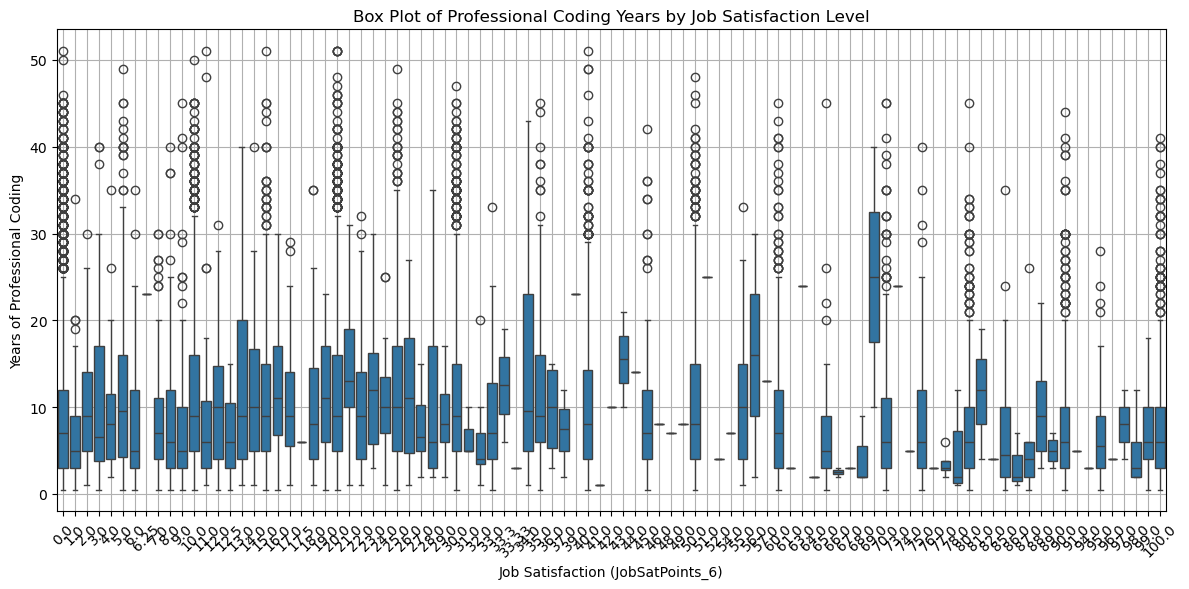

In [22]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load required columns
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Clean the data
df = df.dropna(subset=["YearsCodePro", "JobSatPoints_6"])  # Remove missing values

# Convert YearsCodePro to numeric
# Some values may be strings like 'Less than 1 year' or 'More than 50 years'
def convert_years(x):
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    try:
        return float(x)
    except:
        return None

df["YearsCodePro"] = df["YearsCodePro"].apply(convert_years)
df = df.dropna(subset=["YearsCodePro"])  # Drop rows that couldn't be converted

# Step 4: Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="JobSatPoints_6", y="YearsCodePro")
plt.title("Box Plot of Professional Coding Years by Job Satisfaction Level")
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("Years of Professional Coding")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Insights You’ll Get:
Which job satisfaction levels correspond to more/less coding experience.

Whether experienced developers are generally more or less satisfied.

Outliers (e.g. very experienced but dissatisfied developers).



In [25]:
conn.close()